### Preamble

In [1]:
import sys
sys.path.append('./RECOTOOLS/')
import gistools

In [2]:
# import json
# data = json.load(open("site_metadata.json", "r"))

import pandas as pd
gis_df = pd.read_csv("GIS/generated_gis_model.csv")

## Site Prior Info Plot

In [6]:
import pandas as pd
import plotly.graph_objects as go
from plotting.plotly_tools import *


import matplotlib.pyplot as plt

gis_crown = (gis_df[ np.abs(gis_df.Y) < 1 ]).groupby("X").mean().reset_index()

gis_crown.CROWN[ gis_crown.CROWN > gis_crown.DTM_gradcorr ] = gis_crown.DTM_gradcorr[ gis_crown.CROWN > gis_crown.DTM_gradcorr ]

gis_crown.X=gis_crown.X
gis_crown.DTM_gradcorr=gis_crown.DTM_gradcorr
gis_crown.DSM_gradcorr=gis_crown.DSM_gradcorr

fig = create_geoptic_multix_plot("title=Dinmore-Up Tunnel,type=Elevation Gradient Corrected,xtitle=Distance [m],xrange=-10:580,ytitle=Elevation [m],yrange=-5:60,rows=100:15:15" )

fig.add_trace( geoptic_plot_1d_trace(gis_crown, "thickness=2,x=X,y=DSM_gradcorr,fill=tozeroy,fillcolor=Gray,color=Black,xmin=-10,xmax=580,ytitle=Elevation from Track [m],showlegend,name=Surface Model") )
fig.add_trace( geoptic_plot_1d_trace(gis_crown, "thickness=2,x=X,y=DTM_gradcorr,fill=tozeroy,fillcolor=LightGray,color=Black,xmin=-10,xmax=580,ytitle=Elevation from Track [m],showlegend,name=Terrain Model") )

fig.add_trace( draw_gis_roi_chains(gis_crown, "roiwidth=4,thickness=1,roich=0m4.82ch,portalch=0m0ch,color=blue,showlegend,name=ROI SUS-1A,fillcolor=cyan,fill=tozeroy") )
fig.add_trace( draw_gis_roi_chains(gis_crown, "roiwidth=4,thickness=1,roich=0m12.23ch,portalch=0m0ch,color=red,showlegend,name=ROI OPEN-1,fillcolor=pink,fill=tozeroy") )
fig.add_trace( draw_gis_roi_chains(gis_crown, "roiwidth=4,thickness=1,roich=0m18.95ch,portalch=0m0ch,color=orange,showlegend,name=ROI SUS-0B,fillcolor=yellow,fill=tozeroy") )
fig.add_trace( draw_gis_roi_chains(gis_crown, "roiwidth=4,thickness=1,roich=0m26.05ch,portalch=0m0ch,color=green,showlegend,name=ROI SUS-0A,fillcolor=palegreen,fill=tozeroy") )


gis_crown.CROWN=gis_crown.CROWN-gis_crown.CROWN+6

gis_crown.FLOOR=gis_crown.FLOOR-gis_crown.FLOOR
fig.add_trace( geoptic_plot_1d_trace(gis_crown, "thickness=2,x=X,y=CROWN,fill=tozeroy,fillcolor=White,color=Black,xmin=-10,xmax=580,ytitle=Elevation from Track [m],showlegend,name=CROWN") )
fig.add_trace( geoptic_plot_1d_trace(gis_crown, "thickness=1,x=X,y=FLOOR,fill=tozeroy,fillcolor=LightGray,color=Black,xmin=-10,xmax=580,ytitle=Elevation from Track [m],name=CROWN") )

add_shaft_lines(fig,"shaft=96.9,name=SUS-1A,ymax=42,color=Black")
add_shaft_lines(fig,"shaft=246,name=OPEN-1,ymax=42,color=Black")
add_shaft_lines(fig,"shaft=381.3,name=SUS-0B,ymax=42,color=Black")
add_shaft_lines(fig,"shaft=524,name=SUS-0A,ymax=35,color=Black")
# add_shaft_lines(fig,"shaft=505,name=SHS-E,ymax=32,color=Black")
# # add_shaft_lines_chains(fig,"shaftch=217m74.75ch,portalch=217m62.5ch,name=End Portal,ymax=42,color=Black")

add_grid_lines(fig,"xmin=0,xmax=580,ymin=0,ymax=50,yshow,yspacing=10,layer=above,dash=dot")
add_position_markers(fig,xmin=-10,xmax=580,row=3)

add_roi_box(fig, "roiwidth=3,roi=97,color=blue,showlegend,name=SUS-1A,fillcolor=cyan,fill=tozeroy",row=2)
add_roi_box(fig, "roiwidth=3,roi=246,color=red,showlegend,name=OPEN-1,fillcolor=pink,fill=tozeroy",row=2)
add_roi_box(fig, "roiwidth=3,roi=381,color=orange,showlegend,name=SUS-0B,fillcolor=yellow,fill=tozeroy",row=2)
add_roi_box(fig, "roiwidth=3,roi=524,color=green,showlegend,name=SUS-0A,fillcolor=palegreen,fill=tozeroy",row=2)


fig.show()
geoptic_plot_save(fig)

/tmp/ipykernel_42727/3129355665.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'adddate': False, 'date': '2023-12-11T17:17:16.899639', 'addauthor': False, 'author': '', 'title': 'Dinmore-Up Tunnel', 'type': 'Elevation Gradient Corrected', 'margins': '150,150,150,150', 'xtitle': 'Distance [m]', 'ytitle': 'Elevation [m]', 'rows': '100:15:15', 'xrange': '-10:580', 'yrange': '-5:60'}


<b> <b>Dinmore-Up Tunnel</b><br><i>Elevation Gradient Corrected</i>
</b> Dinmore-Up Tunnel</b><br><i>Elevation Gradient Corrected</i>
<i> Dinmore-Up Tunnel<br><i>Elevation Gradient Corrected</i>
</i> Dinmore-Up Tunnel<br>Elevation Gradient Corrected</i>


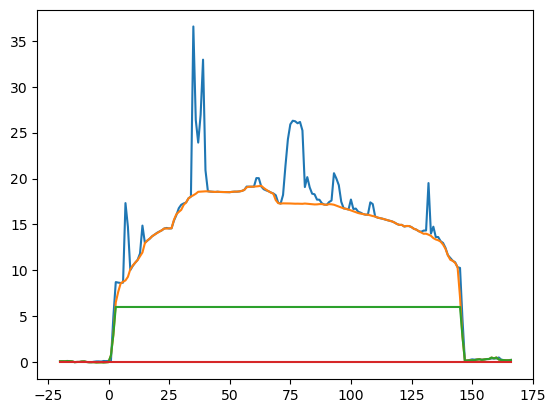

In [4]:
import matplotlib.pyplot as plt


plt.plot( gis_crown.X, gis_crown.DSM_gradcorr )
plt.plot( gis_crown.X, gis_crown.DTM_gradcorr )
plt.plot( gis_crown.X, gis_crown.CROWN_gradcorr )
plt.plot( gis_crown.X, gis_crown.FLOOR_gradcorr )
plt.show()

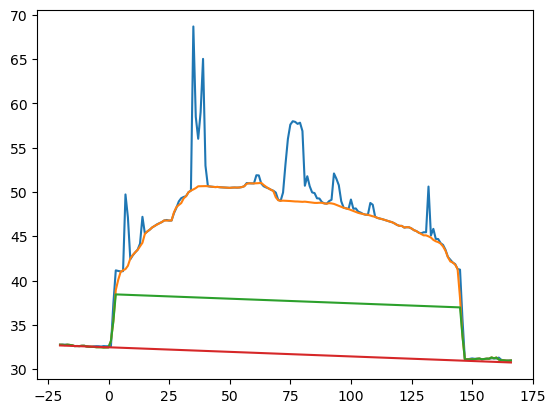

In [5]:
import matplotlib.pyplot as plt


gis_crown = (gis_df[ np.abs(gis_df.Y) < 1 ]).groupby("X").mean().reset_index()

plt.plot( gis_crown.X, gis_crown.DSM )
plt.plot( gis_crown.X, gis_crown.DTM )
plt.plot( gis_crown.X, gis_crown.CROWN )
plt.plot( gis_crown.X, gis_crown.FLOOR )
plt.show()